In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
centroids =[(-5,-5,-5),(5,5,5),(-2.5,2.5,-4),(1,2,3)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centroids, n_features=3, random_state=42)
X[0:5,:]

array([[ 1.21645859,  2.04557184,  2.34839965],
       [-1.84860875,  2.18473076, -3.24103078],
       [ 1.1990597 ,  1.39978312,  3.06980208],
       [ 1.01023306,  1.01849135,  3.46210347],
       [-5.47917424, -5.18565898, -6.10633497]])

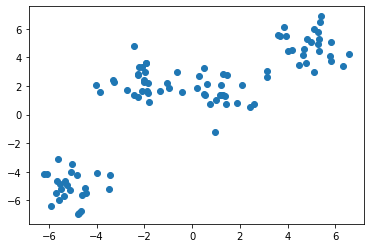

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
import random 
import numpy as np
class KMeans:
  def __init__(self,n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
  def fit_predict(self,X):
    random_index= random.sample(range(0,X.shape[0]),self.n_clusters)
    self.centroids = X[random_index]
    for i in range(self.max_iter):
      #assign clusters 
      cluster_group = self.assign_clusters(X)
      old_centroids = self.centroids
       # move centroids
      self.centroids = self.move_centroids(X,cluster_group)
       # check finish
      if (old_centroids == self.centroids).all():
        break
    return cluster_group, self.centroids
  def move_centroids(self,X,cluster_group):
      new_centroids =[]
      cluster_type = np.unique(cluster_group)
      for type in cluster_type:
        new_centroids.append(X[cluster_group==type].mean(axis=0))
      return np.array(new_centroids)  
  def assign_clusters(self,X):
    cluster_group =[]
    distances =[]
    for row in X:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)    

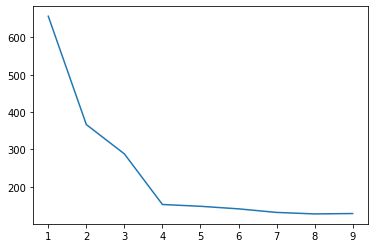

In [ ]:
# km = KMeans(2,100)
# y_means, centers = km.fit_predict(X)
# print(y_means)
ll=[]
for j in range(1,10):
  km = KMeans(j,100)
  d=0
  y_means, centers = km.fit_predict(X)
  for i in range(len(X)):
    d += np.sqrt(np.dot(centers[y_means[i]]-X[i],centers[y_means[i]]-X[i]))
  ll.append(d)   

# plt.scatter(X[y_means ==0,0], X[y_means ==0,1], color ='red')
# plt.scatter(X[y_means ==1,0], X[y_means ==1,1], color = 'blue')
# plt.show()

c = range(1,10)
plt.plot(c,ll)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss =[]
for i in range(1,10):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

In [ ]:
wcss

[4933.166828360656,
 1453.7590011744317,
 630.8002196124155,
 277.5025913413585,
 249.35065395312182,
 226.29893226329648,
 201.25373623964038,
 187.22172966788946,
 166.68190086106102]

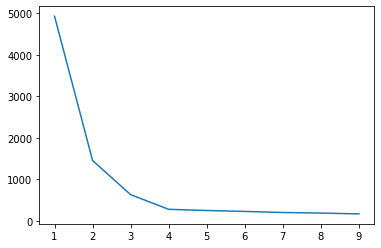

In [ ]:
plt.plot(range(1,10),wcss)

In [ ]:
km = KMeans(n_clusters=4)
y_means =km.fit_predict(X)
y_means

array([3, 0, 3, 3, 2, 3, 0, 3, 1, 3, 1, 3, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0,
       2, 3, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 0, 3, 2, 1, 3, 3,
       0, 0, 1, 2, 2, 1, 1, 3, 1, 2, 1, 2, 3, 1, 0, 1, 1, 0, 0, 3, 0, 3,
       2, 3, 0, 2, 0, 1, 0, 2, 3, 0, 3, 3, 2, 0, 3, 3, 2, 1, 3, 2, 0, 2,
       1, 0, 2, 3, 3, 3, 1, 0, 2, 0, 2, 1], dtype=int32)

In [ ]:
X[y_means==0,1]

array([2.18473076, 3.32206016, 2.42289829, 1.61614256, 1.3570297 ,
       2.42717109, 0.88728413, 2.84644821, 1.52531833, 2.23534317,
       4.81465857, 3.58305124, 1.25426122, 1.74626384, 3.01504769,
       2.97383292, 1.56217496, 2.79307247, 3.63556564, 1.64284244,
       3.32718325, 1.67931768, 2.27653721, 2.05348505, 2.26318139])

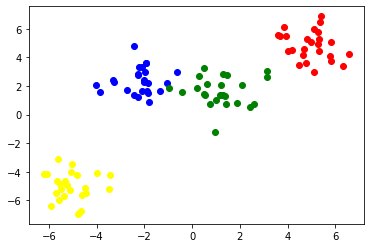

In [ ]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color = 'blue')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color = 'red')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color = 'yellow')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color = 'green')

In [ ]:
import plotly.express as px
# fig = px.scatter_3d(x=X[:,0],y=X[:,1],z =X[:,2])
fig = px.scatter_3d(X, x=0, y= 1, z =2)
fig.show()